# Top 5 Quotes dummy model

In [ ]:
import pandas as pd
import itertools
import re
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import string
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
file = "../raw_data/quotes - reduced.csv"
quotes = pd.read_csv(file, decimal=",")
quotes.head(3)

,quote,author,category
0,"I'm selfish, impatient and a little insecure. ...",Marilyn Monroe,"attributed-no-source, best, life, love, mistak..."
1,You've gotta dance like there's nobody watchin...,William W. Purkey,"dance, heaven, hurt, inspirational, life, love..."
2,You know you're in love when you can't fall as...,Dr. Seuss,"attributed-no-source, dreams, love, reality, s..."


In [3]:
tags_list = quotes.category.to_list()
number_of_tags = []
for i in tags_list:
    number_of_tags.append(len(str(i).split(',')))

In [4]:
quotes['quotes_length'] = quotes['quote'].copy()
for index, row in quotes.iterrows():
    quotes.loc[index, "quotes_length"] = len(str(row['quotes_length']).split(' '))

## Cleaning data: tags are all lowercase, '-' were replaced with ',', duplicates were removed

In [5]:
for index, row in quotes.iterrows():
    quotes.loc[index, "category"] = str(row['category']).lower().replace('-',', ')

In [6]:
quotes['list_tags'] = quotes['category'].copy()
for index,row in quotes.iterrows():
    quotes.loc[index, 'count_tags'] = len(str(row['list_tags']).split(','))
quotes.count_tags.describe()

count    154318.000000
mean          9.758272
std          15.418337
min           1.000000
25%           3.000000
50%           5.000000
75%          11.000000
max         568.000000
Name: count_tags, dtype: float64

In [7]:
for index,row in quotes.iterrows():
    quotes.at[index, 'list_tags'] = str(row['list_tags']).split(',')

In [8]:
for index,row in quotes.iterrows():
    quotes.at[index, 'list_tags'] = str(set(row['list_tags']))

In [9]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text
quotes['list_tags'] = quotes['list_tags'].apply(remove_punctuations)

In [10]:
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words="english")
tags_vectorized = vectorizer.fit_transform(quotes['list_tags'])
dummy_tags = LatentDirichletAllocation(n_components=5)
lda_vectors = dummy_tags.fit_transform(tags_vectorized)

In [11]:
def print_topics(model, vectorizer):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names_out()[i], topic[i])
                        for i in topic.argsort()[:-10 - 1:-1]])
        

print_topics(dummy_tags, vectorizer.fit(quotes['list_tags']))

Topic 0:
[('humor', 1764.5564310616714), ('death', 1757.2756728312966), ('books', 1725.8168808965365), ('reading', 1373.9845557720403), ('romance', 1287.6157397430463), ('debasish', 1103.2124162291727), ('feminism', 1004.1313398206244), ('love', 955.4051221793081), ('god', 892.2980408559707), ('women', 862.5881968474065)]
Topic 1:
[('writing', 1954.4366442213461), ('art', 1235.0425082007885), ('children', 776.914224614157), ('psychology', 667.1526621970057), ('money', 514.428554843274), ('dreams', 459.1669493640958), ('music', 420.7101872182142), ('life', 345.2666393631447), ('creativity', 294.2906920748076), ('humor', 276.67166475385164)]
Topic 2:
[('inspirational', 4633.721928984054), ('life', 3726.8602898121762), ('quotes', 3380.0745961906287), ('wisdom', 2676.1027466955306), ('love', 2440.508624071583), ('happiness', 1975.360728604923), ('philosophy', 1879.6502496281175), ('truth', 1857.242151053079), ('motivational', 1741.5071739440268), ('hope', 1670.7320073211524)]
Topic 3:
[('l

In [12]:
lda_vectors[1]

array([0.36058611, 0.45498145, 0.06202246, 0.06322233, 0.05918764])

In [13]:
quotes.head()

,quote,author,category,quotes_length,list_tags,count_tags
0,"I'm selfish, impatient and a little insecure. ...",Marilyn Monroe,"attributed, no, source, best, life, love, mist...",41,best life no out of attributed mistakes ...,12.0
1,You've gotta dance like there's nobody watchin...,William W. Purkey,"dance, heaven, hurt, inspirational, life, love...",22,life inspirational hurt heaven dance sing...,7.0
2,You know you're in love when you can't fall as...,Dr. Seuss,"attributed, no, source, dreams, love, reality,...",18,dreams no attributed sleep reality source...,7.0
3,A friend is someone who knows all about you an...,Elbert Hubbard,"friend, friendship, knowledge, love",13,friendship friend knowledge love,4.0
4,Darkness cannot drive out darkness: only light...,"Martin Luther King Jr., A Testament of Hope: T...","darkness, drive, out, hate, inspirational, lig...",20,drive light out darkness hate inspiration...,8.0


In [14]:
quotes.iloc[-1] = ['A large crowd is assembled on an outdoor street scene , with toy balloons visible and a woman walking a pink bicyc', 'image','image','5','A large crowd is assembled on an outdoor street scene , with toy balloons visible and a woman walking a pink bicyc','1']

In [15]:
picture_vectorized = vectorizer.transform(quotes.iloc[-1])
lda_vectors_self = dummy_tags.transform(picture_vectorized)
for index,row in quotes.iterrows():
    quotes['topic'] = quotes.quote.copy()

In [16]:
for index,row in quotes.iterrows():
    quotes.at[index, 'topic'] = int(np.where(lda_vectors[index] == max(lda_vectors[index]))[0])

In [17]:
quotes.tail()

,quote,author,category,quotes_length,list_tags,count_tags,topic
154313,The harassed look is that of a desperately tir...,"Christopher Isherwood, A Single Man","dying, living",96,living dying,2.0,0
154314,…In this way that he sought to control the ver...,"Jesse Ball, The Curfew","life, living, mindfulness",39,living mindfulness life,3.0,2
154315,"No matter how we choose to live, we both die a...","Adam Silvera, They Both Die at the End","death, living",13,death living,2.0,0
154316,The goal that you hope you will one day arrive...,"Marcus Aurelius, The Essential Marcus Aurelius",living,239,living,1.0,2
154317,A large crowd is assembled on an outdoor stree...,image,image,5,A large crowd is assembled on an outdoor stree...,1,1


(array([27521.,     0., 26343.,     0.,     0., 44514.,     0., 28477.,
            0., 27463.]),
 array([0.0, 0.4, 0.8, 1.2000000000000002, 1.6, 2.0, 2.4000000000000004,
        2.8000000000000003, 3.2, 3.6, 4.0], dtype=object),
 <BarContainer object of 10 artists>)

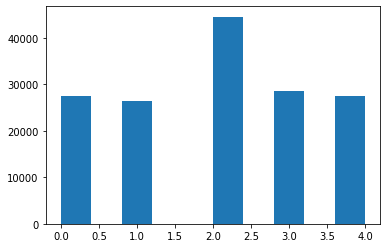

In [18]:
plt.hist(quotes.topic)

__Adding the image caption as the last line to our dataset to be able to see the closest neighbourhs__

In [19]:
image_topic = int(quotes.iloc[-1, [-1]])
image_topic

1

In [20]:
quotes = quotes.dropna()
only_topic = quotes[quotes.topic == image_topic]
only_topic.head()

,quote,author,category,quotes_length,list_tags,count_tags,topic
0,"I'm selfish, impatient and a little insecure. ...",Marilyn Monroe,"attributed, no, source, best, life, love, mist...",41,best life no out of attributed mistakes ...,12.0,1
1,You've gotta dance like there's nobody watchin...,William W. Purkey,"dance, heaven, hurt, inspirational, life, love...",22,life inspirational hurt heaven dance sing...,7.0,1
2,You know you're in love when you can't fall as...,Dr. Seuss,"attributed, no, source, dreams, love, reality,...",18,dreams no attributed sleep reality source...,7.0,1
21,"I'm in love with you,"" he said quietly.""August...","John Green, The Fault in Our Stars","doomed, inevitable, love, oblivion, pleasure, ...",112,simple inevitable oblivion doomed pleasure...,6.0,1
25,"If you can make a woman laugh, you can make he...",Marilyn Monroe,"attributed, no, source, girls, love",13,no attributed source girls love,5.0,1


In [21]:
tfidf_weight = vectorizer.fit_transform(only_topic['list_tags'].values.astype('U'))
nn_euc = NearestNeighbors(metric = 'euclidean')
nn_euc.fit(tfidf_weight)
image_index = -1
euc, indices = nn_euc.kneighbors(tfidf_weight[image_index], n_neighbors = 100)
neighbors_euc = pd.DataFrame({'euc': euc.flatten(), 'id': indices.flatten()})
result_top5 = (only_topic.merge(neighbors_euc, right_on = 'id', left_index = True).
                sort_values('euc')[['quote', 'author']]).head()

result_top5

,quote,author
9,"What I cannot love, I overlook.",Anaïs Nin
15,This is the strangest life I have ever known.,Jim Morrison
26,Fail soon so that you can succeed sooner.,"Amit Kalantri, Wealth of Words"
32,Convert your time into useful assets,Sunday Adelaja
33,Living with him is like being told a perpetual...,"Sylvia Plath, The Unabridged Journals of Sylvi..."


In [ ]:
most_suiting = quotes[quotes.topic != image_topic]
own_tags = input("Please give me 5 words that are descriptive of your picture:")
most_suiting.iloc[-1] = [own_tags,'image','image','5',own_tags,'1',image_topic]
most_suiting.tail()

In [ ]:
tfidf_weight = vectorizer.fit_transform(most_suiting['list_tags'].values.astype('U'))
nn_euc = NearestNeighbors(metric = 'euclidean')
nn_euc.fit(tfidf_weight)
image_index = -1
euc, indices = nn_euc.kneighbors(tfidf_weight[image_index], n_neighbors = 100)
neighbors_euc = pd.DataFrame({'euc': euc.flatten(), 'id': indices.flatten()})
result_most_s = (only_topic.merge(neighbors_euc, right_on = 'id', left_index = True).
                sort_values('euc')[['quote', 'author']]).head(1)

result_most_s.quote

### Trying word2vec for the most suiting quote for better result

In [ ]:
word2vec = Word2Vec(sentences=most_suiting.list_tags, vector_size=100, min_count=1, window=10)

In [ ]:
# Function to convert a sentence (list of words) into a matrix representing the words in the embedding space
def embed_sentence(word2vec, sentence):
    embedded_sentence = []
    for word in sentence:
        if word in word2vec.wv:
            embedded_sentence.append(word2vec.wv[word])
        
    return np.array(embedded_sentence)

# Function that converts a list of sentences into a list of matrices
def embedding(word2vec, sentences):
    embed = []
    
    for sentence in sentences:
        embedded_sentence = embed_sentence(word2vec, sentence)
        embed.append(embedded_sentence)
        
    return embed

# Embed the training and test sentences
tags_embed = embedding(word2vec, most_suiting.list_tags)

# Pad the training and test embedded sentences
tags_pad = pad_sequences(tags_embed, dtype='float32', padding='post', maxlen=200)

In [ ]:
for X in most_suiting.list_tags:
    assert type(X) == np.ndarray
    assert X.shape[-1] == word2vec.wv.vector_size

assert tags_pad.shape[0] == len(most_suiting.list_tags)

In [ ]:
result = word2vec.most_similar(positive=[own_tags], topn=1)
result